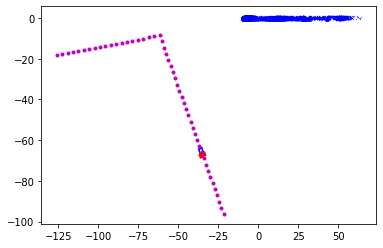

In [2]:
#This is going to be the Python simulation node. Currently just a code to plot the trajectory of the modeled car
#as calculated by the MPC node in Julia, and the path follower code used as another node

# importing libraries
import matplotlib
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
import numpy as np
from PIL import Image
import pandas as pd
import csv
import time
from IPython import display
# from scipy.io import loadmat


# x=loadmat('NewMap.fig')
# #plt.plot()
# fig = plt.show()
# ax = plt.gca()
# plt.show()

# #open map image and resize to size of carpark
# image = Image.open('Map.png')
# # Read Images  
# new_image = image.resize((300, 200))
# new_image.save('Map_resize.png')
# plt.imshow(new_image)
# fig = plt.
# img = mpimg.imread('Map.png')
# print(img.shape)
# new_image = plt.imshow(img)
# plt.show()
#load in MPC generated data for X, Y, velocity and heading at each point

opened_file = open('Pointcloud.csv')
from csv import reader
read_file = reader(opened_file)
points = list(read_file)
n=len(points)
p_list = [list(map(float,i)) for i in points]
p_list=np.array(p_list)
print(p_list)

opened_file = open('Z.csv')
from csv import reader
read_file = reader(opened_file)
Z = list(read_file)
n=len(Z)
z_list = [list(map(float,i)) for i in Z]
z_list=np.array(z_list)

opened_file = open('U.csv') 
read_file = reader(opened_file)
u = list(read_file)
n=len(u)
u_list = [list(map(float,i)) for i in u]
u_list=np.array(u_list)
u=np.array(u_list)



opened_file = open('waypoints.csv')
from csv import reader
read_file = reader(opened_file)
wayp = list(read_file)
n=len(wayp)
waypoints = [list(map(float,i)) for i in wayp]
waypoints=np.array(waypoints)
    
    
def plotting_func(z0,u):
    #returns the next x,y coordinates of the car
    # Parameters of car
    lf = 1.738
    lr = 1.738
    width = 2
    # Assume the length of the wheel is 0.5
    lw = 0.5
    #figure
    # front
    x_f = z0[0]+lf*np.cos(z0[3])
    y_f = z0[1]+lf*np.sin(z0[3])
    # front left
    x_f_l = x_f-(width/2)*np.sin(z0[3])
    y_f_l = y_f+(width/2)*np.cos(z0[3])
    # front right
    x_f_r = x_f+(width/2)*np.sin(z0[3])
    y_f_r = y_f-(width/2)*np.cos(z0[3])
    # rear
    x_r = z0[0]-lr*np.cos(z0[3])
    y_r = z0[1]-lr*np.sin(z0[3])
    # rear left
    x_r_l = x_r-(width/2)*np.sin(z0[3])
    y_r_l = y_r+(width/2)*np.cos(z0[3])
    # rear right
    x_r_r = x_r+(width/2)*np.sin(z0[3])
    y_r_r = y_r-(width/2)*np.cos(z0[3])
    
    x_d1=[x_f_l,x_f_r]
    x_d2=[x_f_l,x_r_l]
    x_d3=[x_r_l,x_r_r]
    x_d4=[x_f_r,x_r_r]
    y_d1=[y_f_l,y_f_r]
    y_d2=[y_f_l,y_r_l]
    y_d3=[y_r_l,y_r_r]
    y_d4=[y_f_r,y_r_r]
    # calculate the wheel
    # left wheel
    w_f_l_x = x_f_l+(lw/2)*np.cos(z0[3]+u[1])
    w_r_l_x = x_f_l-(lw/2)*np.cos(z0[3]+u[1])
    w_f_l_y = y_f_l+(lw/2)*np.sin(z0[3]+u[1])
    w_r_l_y = y_f_l-(lw/2)*np.sin(z0[3]+u[1])
    # right wheel
    w_f_r_x = x_f_r+(lw/2)*np.cos(z0[3]+u[1])
    w_r_r_x = x_f_r-(lw/2)*np.cos(z0[3]+u[1])
    w_f_r_y = y_f_r+(lw/2)*np.sin(z0[3]+u[1])
    w_r_r_y = y_f_r-(lw/2)*np.sin(z0[3]+u[1])

    # Draw the wheel
    #pause(1)
    
    #plt.plot(z_list[0,:], z_list[1,:],'r-')
    obj=np.array([x_d1,x_d2,x_d3,x_d4,y_d1,y_d2,y_d3,y_d4])
    wheels=np.array([w_f_l_x,w_r_l_x,w_f_r_x,w_r_r_x,w_f_l_y,w_r_l_y,w_f_r_y,w_r_r_y])
    return obj, wheels
    
        
def run(niter=100):
    #to animate the figure
    i=1
    fig = plt.figure()
    ax = plt.gca()
#     ax.set_aspect('equal')
    
    #ax.set_xlim(-300, 1314)
    #ax.set_ylim(1036, -300)
    u=np.array(u_list[i,:])
    z0=np.array([z_list[i,0],z_list[i,1], z_list[i,2], z_list[i,3]])
    
    obj, wheels=plotting_func(z0,u)

#     plt.show(False)

    h1 = ax.plot(obj[0], obj[4],'b-')[0]
    h2 = ax.plot(obj[1], obj[5], 'b-')[0]
    h3 = ax.plot(obj[2], obj[6], 'b-')[0]
    h4 = ax.plot(obj[3], obj[7], 'b-')[0]
    h5=ax.plot([wheels[0],wheels[1]],[wheels[4],wheels[5]],'r-',linewidth=4)[0]
    #h6=ax.plot(wheels[1],wheels[5],'r-')[0]
    h7=ax.plot([wheels[2],wheels[3]],[wheels[6],wheels[7]],'r-',linewidth=4)[0]
    #h8=ax.plot(wheels[3],wheels[7],'r-')[0] 
    h9 = ax.plot(waypoints[:,0], waypoints[:,1], 'm.')
    h10=ax.plot(p_list[:,0],p_list[:,1],'b.',markersize=0.5)
    tic = time.time()

    for ii in range(niter):

        # update the xy data
        obj,wheels = plotting_func(np.array([z_list[i,0],z_list[i,1], z_list[i,2], z_list[i,3]]),np.array(u_list[i,:]))
        h1.set_data(obj[0], obj[4])
        h2.set_data(obj[1], obj[5])
        h3.set_data(obj[2], obj[6])
        h4.set_data(obj[3], obj[7])
        h5.set_data([wheels[0],wheels[1]],[wheels[4],wheels[5]])
        #h6.set_data(wheels[1],wheels[5])
        h7.set_data([wheels[2],wheels[3]],[wheels[6],wheels[7]])
        #h8.set_data(wheels[3],wheels[7])
        #h7 = ax.plot(waypoints[ii,0], waypoints[ii,1], 'mo')
        
        start = time.time()
        # redraw everything
        fig.canvas.draw()
        time.sleep(0.4)
        
        timer = fig.canvas.new_timer(interval=1)
        #timer.add_callback(update)
        timer.start()
        fig.canvas.blit(ax.bbox)
        i=i+1
        plt.show()
        ax.relim()
        ax.autoscale_view(True, True, True)
        display.clear_output(wait=True)
        display.display(fig)
    #plt.close(fig)
run()